# Customer Churn Analysis: Exploratory Data Analysis

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv("D:\Python\Chapter_16. Customer_Churn_Analysis_Python\Dataset\customer_churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [255]:
 # shows total rows and columns
df.shape

(7043, 21)

In [256]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [257]:
# drop customerID column
df = df.drop(['customerID'], axis = 1)

In [258]:
# convert SeniorCitizen to Yes/No
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "Yes" if x == 1 else "No")

In [259]:
# change TotalCharges to numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [260]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [261]:
# count missing values in each column
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [262]:
# display null value rows
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [263]:
# drop rows where tenure is 0
df = df.drop(labels = df[df['tenure'] == 0].index, axis = 0)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [264]:
# get categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [265]:
# exploring unique values in categorical columns
for col in cat_cols:
	print(col, df[col].unique())
	print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen ['No' 'Yes']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No in

In [266]:
# Replacing 'No phone service' / 'No internet service' -->> NO
replace_map = {
    'No phone service': 'No',
    'No internet service': 'No'
}

df.replace(replace_map, inplace=True)

In [267]:
# exploring unique values in categorical columns
for col in cat_cols:
	print(col, df[col].unique())
	print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen ['No' 'Yes']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes']
--------------------------------------------------
OnlineBackup ['Yes' 'No']
--------------------------------------------------
DeviceProtection ['No' 'Yes']
--------------------------------------------------
TechSupport ['No' 'Yes']
--------------------------------------------------
StreamingTV ['No' 'Yes']
--------------------------------------------------
StreamingMovies ['No' 'Yes']
--------------------------------

In [268]:
# summary statistics for numeric columns
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Exploratory Data Analysis (EDA)

### 1. Target Variable: Churn Distribution

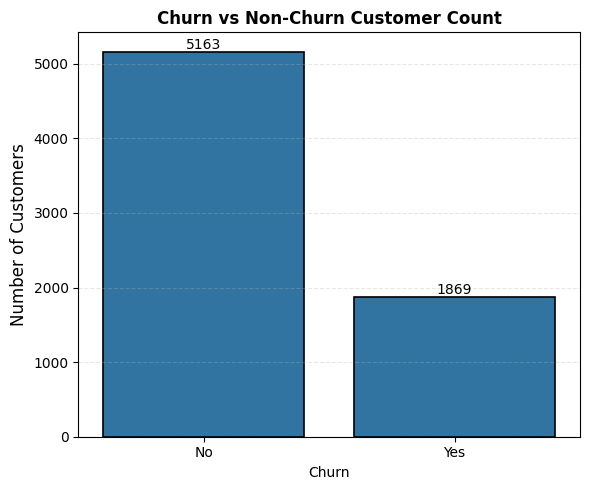

In [288]:
# How many customers churned vs not churned

plt.figure(figsize=(6,5))

ax = sns.countplot(
    x = 'Churn',
    data = df,
    linewidth=1.2,
    edgecolor='black'
)

# Add data labels on each bar
ax.bar_label(ax.containers[0], fontsize=10)

# Titles & labels
plt.title("Churn vs Non-Churn Customer Count", fontsize=12, fontweight='bold')
plt.ylabel("Number of Customers", fontsize=12)

# Add light horizontal gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**Insight:** Most customers (around 73%) did not churn, while about 27% left the company. This shows that churn is not the majority, but still a serious issue that the company must focus on.

### 2. Numerical Features vs Churn

In [270]:
# KDE Plot: Numerical Features vs Churn

def plot_num_vs_churn(feature):
    
    plt.figure(figsize=(9, 4))

    # KDE for non-churned customers
    sns.kdeplot(
        data=df[df['Churn'] == 'No'][feature],
        fill=True,
        label='Churn: NO',
        linewidth=1.2,
        alpha=0.6
    )

    # KDE for churned customers
    sns.kdeplot(
        data=df[df['Churn'] == 'Yes'][feature],
        fill=True,
        label='Churn: Yes',
        linewidth=1.2,
        alpha=0.6
    )

    # Title and labels
    plt.title(f"Churn by {feature}", fontsize=12, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    
    plt.legend(fontsize=12)

    # Add light horizontal gridlines for readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

#### How Long Customers Stay Before Churning

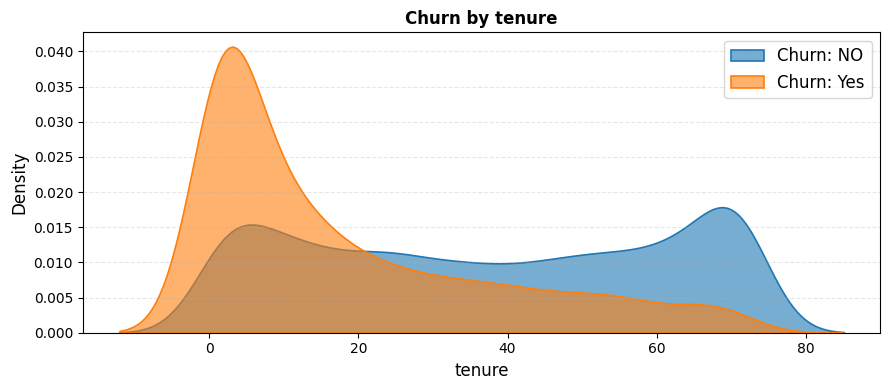

In [271]:
# Call the function for tenure column
plot_num_vs_churn('tenure')

**Insight:** New customers (0-10 months) churn the most. Long-term customers (40+ months) rarely leave. Focus on retention efforts in the first year.

#### Do Higher Bills Lead to More Churn?

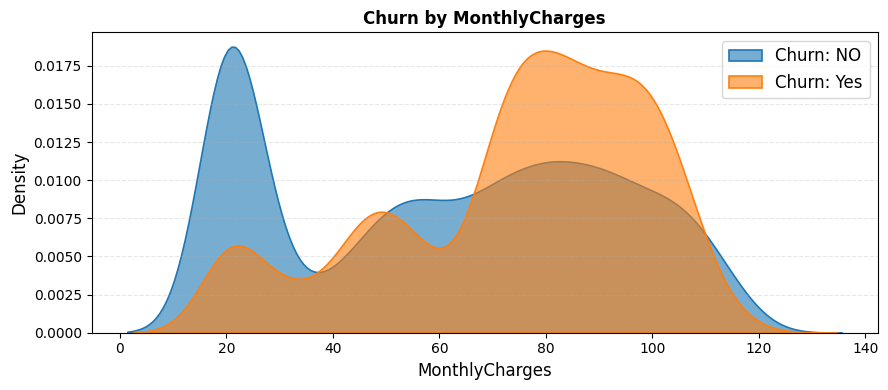

In [272]:
# Call the function for MonthlyCharges column
plot_num_vs_churn('MonthlyCharges')

**Insight:** Customers paying higher monthly charges ($70-100+) churn more often. Lower-paying customers tend to stay. High prices may push customers away.

#### Lifetime Spending and Churn

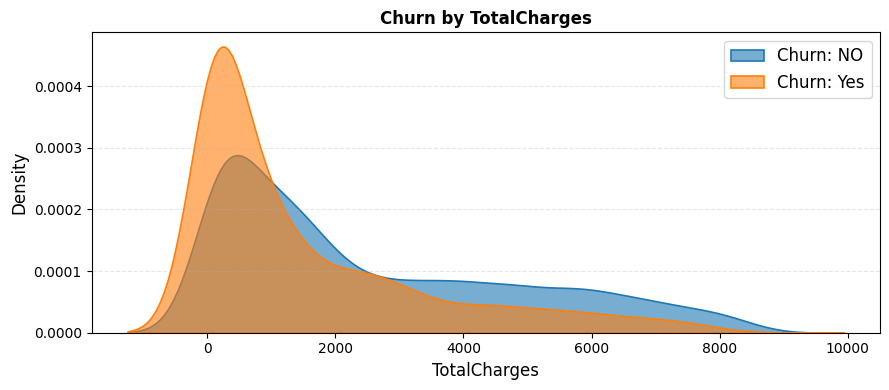

In [273]:
# Call the function for TotalCharges column
plot_num_vs_churn('TotalCharges')

**Insight:** Customers with low total charges churn quickly as they leave before spending much, confirming that new customers churn the most. Customers with high total charges stay longer due to loyalty and satisfaction.

### 3. Categorical Features vs Churn

In [274]:
# Count plot: categorical feature vs Churn

def plot_cat_vs_churn(col_name):

    plt.figure(figsize=(8,5))

    ax = sns.countplot(
        data=df,
        x=col_name,
        hue='Churn',
        linewidth=1.2,
        edgecolor='black'
    )

    # Add data labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

    # Title & label
    plt.title(f"Churn by {col_name}", fontsize=12, fontweight="bold")
    plt.ylabel("Number of Customers", fontsize=12)

    # Add light horizontal gridlines for readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

#### Are Senior Citizens More Likely to Churn?

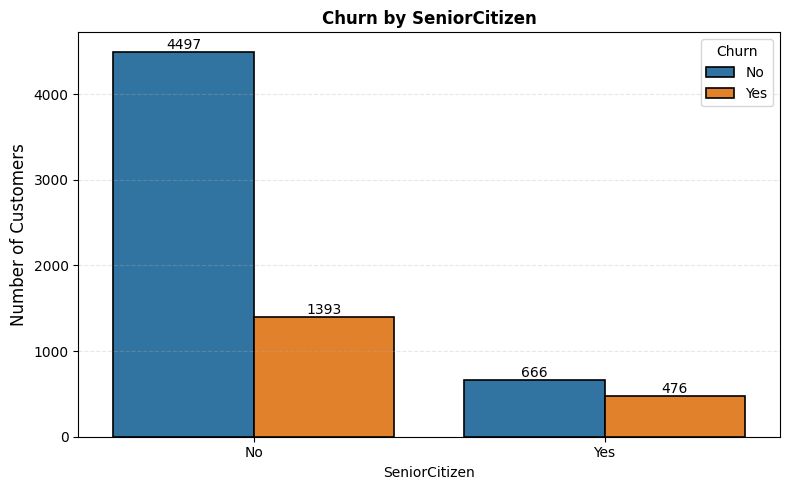

In [275]:
# Call the function for SeniorCitizen column
plot_cat_vs_churn('SeniorCitizen')

**Insight:**
* Senior citizens churn at 41.7% (476 out of 1,142), while non-seniors churn at only 23.6% (1,393 out of 5,890).
* Senior citizens are almost twice as likely to leave, so they may need special offers or better support to stay.

#### Does Having a Partner Affect Churn?

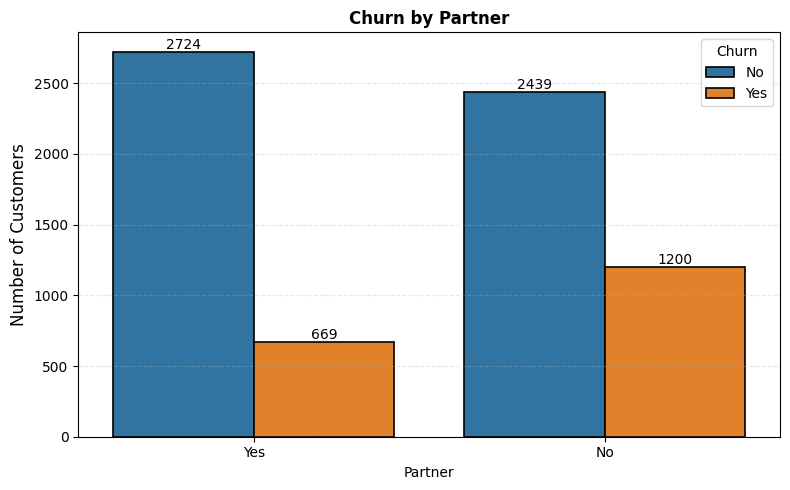

In [276]:
# Call the function for Partner column
plot_cat_vs_churn('Partner')

**Insight:** Customers without a partner churn more often than those with partners, possibly because single customers are more price-sensitive.

#### Do Family Responsibilities Reduce Churn?

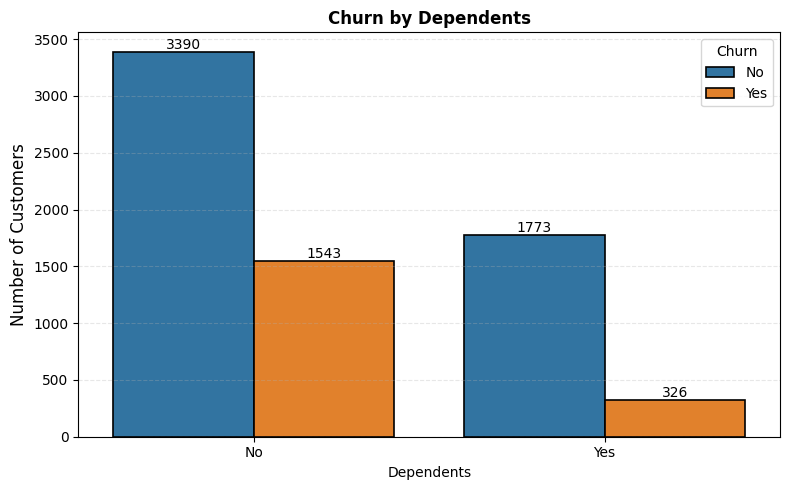

In [277]:
# Call the function for Dependents column
plot_cat_vs_churn('Dependents')

**Insight:** Customers without dependents churn more because switching services is easier for individuals. Customers with dependents stay longer since changing providers affects the whole family and creates more inconvenience.

#### Which Internet Type Has the Highest Churn?

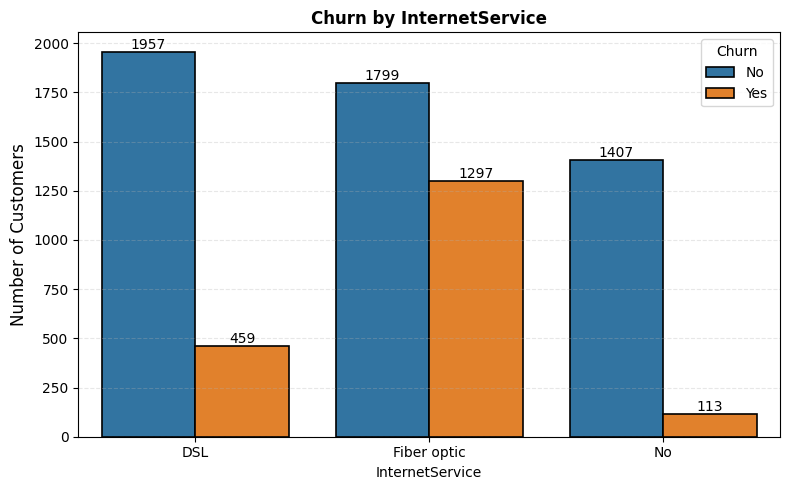

In [278]:
# Call the function for InternetService column
plot_cat_vs_churn('InternetService')

**Insight:** Fiber optic customers churn the most, followed by DSL. Customers with no internet rarely leave. Fiber optic may have service quality or pricing issues.

#### Does Online Security Service Reduce Churn?

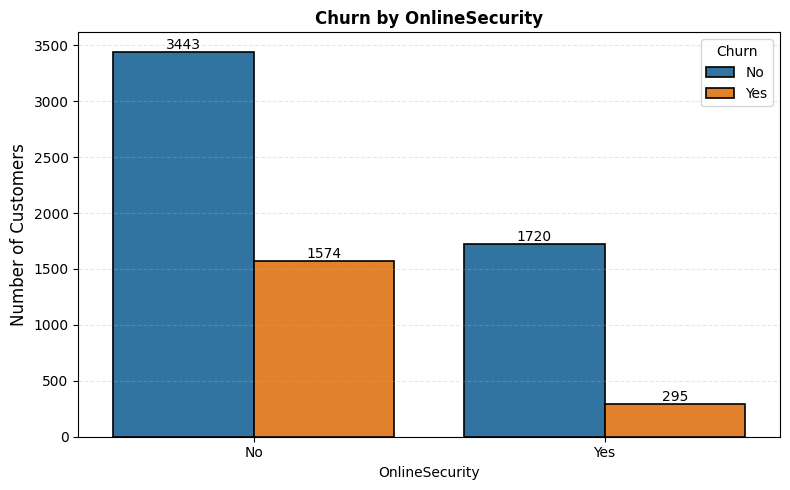

In [279]:
# Call the function for OnlineSecurity column
plot_cat_vs_churn('OnlineSecurity')

**Insight:** Customers WITHOUT online security churn much more. Those with the service stay longer. Offering security features helps retain customers.

#### Does Online Backup Service Reduce Churn?

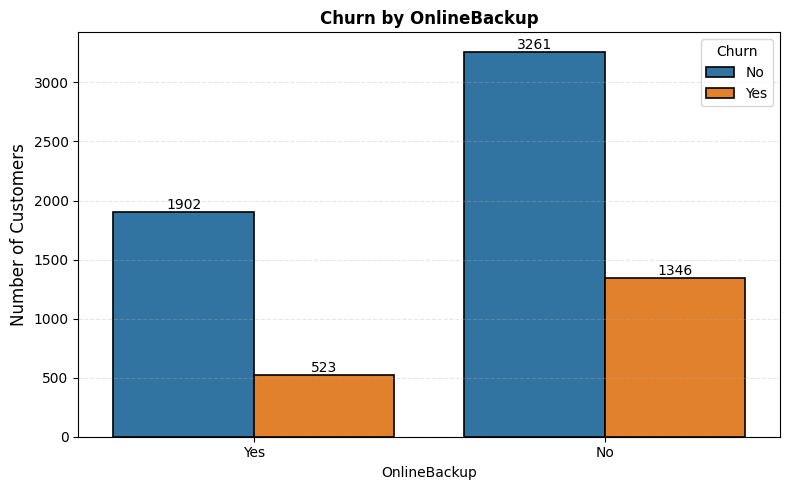

In [280]:
# Call the function for OnlineBackup column
plot_cat_vs_churn('OnlineBackup')

**Insight:** customers without online backup leave more often. Add-on services create "stickiness" and reduce churn.

#### Does Device Protection Reduce Churn?

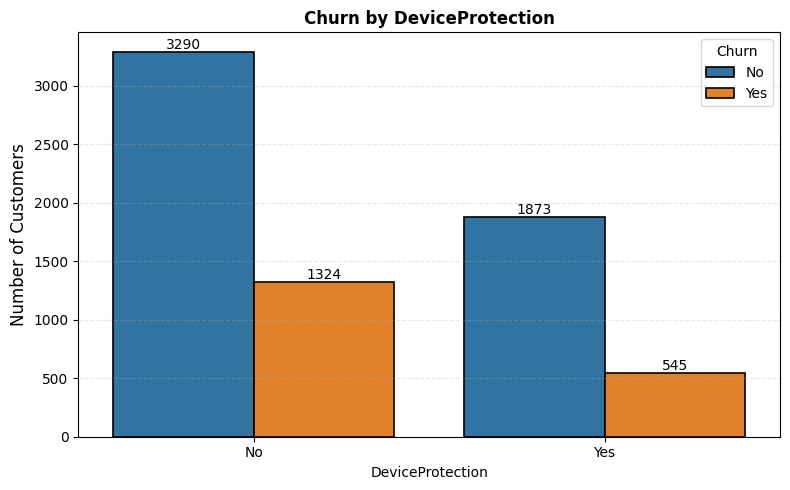

In [281]:
# Call the function for DeviceProtection column
plot_cat_vs_churn('DeviceProtection')

**Insight:** Customers without device protection are more likely to churn. Bundling protection services may improve retention.

#### Does Tech Support Access Affect Churn?

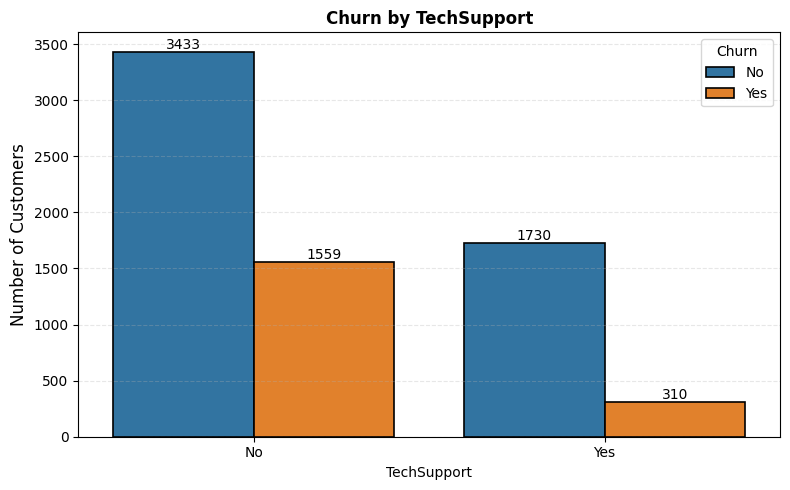

In [282]:
# Call the function for TechSupport column
plot_cat_vs_churn('TechSupport')

**Insight:** Customers without tech support churn at much higher rates. Good support leads to happy customers who stay.

#### Which Contract Type Has the Highest Churn?

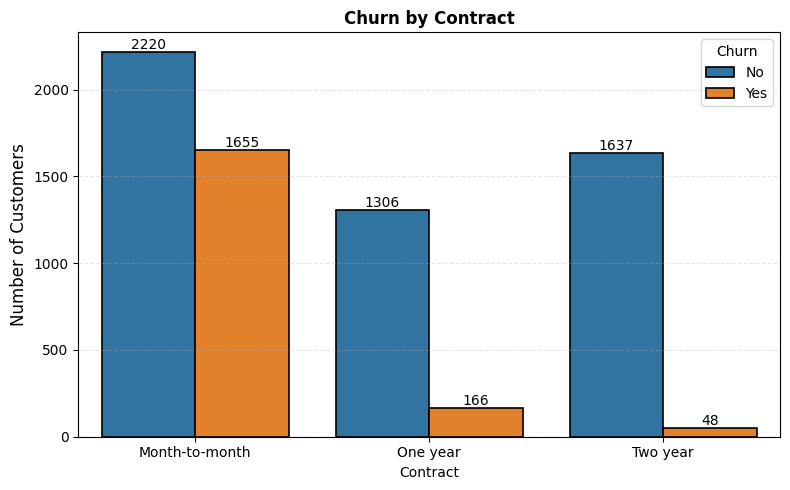

In [283]:
# Call the function for Contract column
plot_cat_vs_churn('Contract')

**Insight:** Month-to-month customers churn the most. One-year and two-year contract customers rarely leave. Encourage longer contracts to reduce churn.

#### Does Paperless Billing Affect Churn?

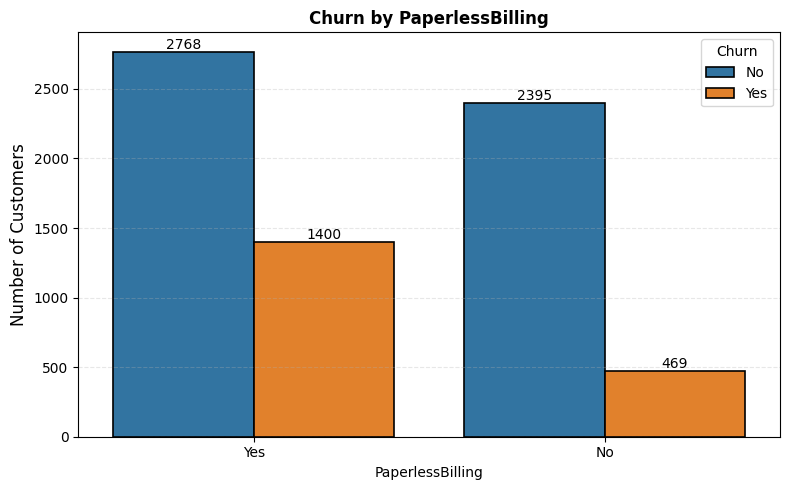

In [284]:
# Call the function for PaperlessBilling column
plot_cat_vs_churn('PaperlessBilling')

**Insight:** Customers with paperless billing churn more because they are tech-savvy and can easily switch to another provider if they find a better deal.

#### Which Payment Method Has the Highest Churn?

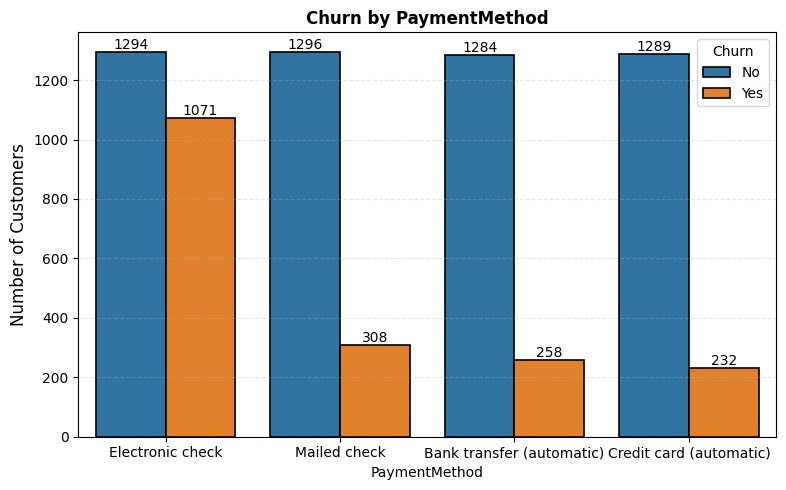

In [285]:
# Call the function for PaymentMethod column
plot_cat_vs_churn('PaymentMethod')

**Insight:** Electronic check users churn more because manual payments require effort each month. Auto-pay customers (bank transfer, credit card) stay longer due to hassle-free billing.

### 4. Correlation Between Numerical Features (Tenure, Monthly Charges & Total Charges)

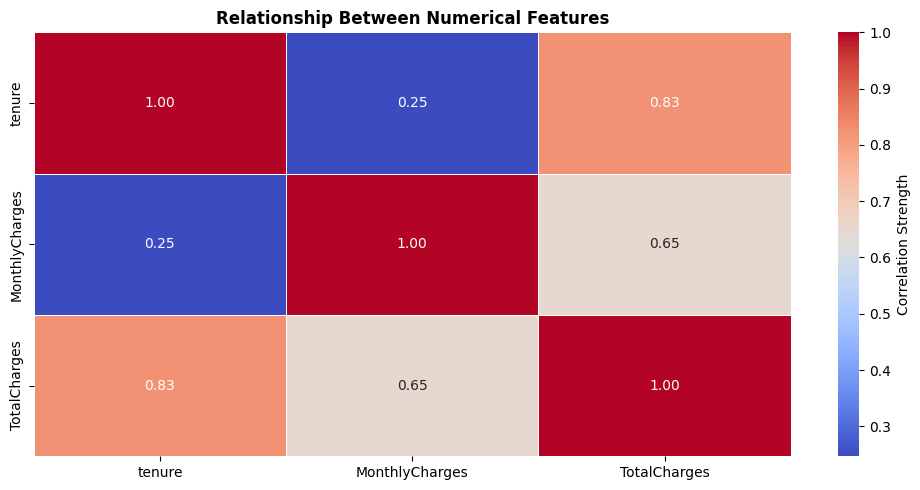

In [286]:
# Correlation Heatmap of Numerical Features

plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Strength'}
)

plt.title("Relationship Between Numerical Features", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**
* Tenure & TotalCharges (0.83) — Customers who stay longer pay more in total.
* MonthlyCharges & TotalCharges (0.65) — Higher monthly bills lead to higher total payments.
* Tenure & MonthlyCharges (0.25) — Customers paying high monthly bills don't always stay longer.        Even new customers can have high bills.

# Key Insights Summary

| Factor | High Churn Group  | Low Churn Group |
|--------|------------------|-----------------|
| **Tenure** | 0–12 months  | 48+ months |
| **Monthly Charges** | Above 70 | Below 40 |
| **Contract** | Month-to-month | One-year or Two-year |
| **Internet Service** | Fiber optic | DSL or No internet service |
| **Payment Method** | Electronic check | Auto-pay (Bank transfer or Credit card) |
| **Add-on Services** | Without security/support | With security/support |
| **Demographics** | Senior citizens, No partner | Non-seniors, With partner |

# Recommendations to Reduce Churn

**1. Focus on New Customers :** Give welcome offers, do regular check-ins, and provide quick support so they don’t leave early.

**2. Promote Long-Term Contracts:** Offer discounts, loyalty rewards, and bundle pricing for yearly contracts.

**3. Move Customers to Auto-Pay:** Reward customers who set up auto-pay with bank or credit card.

**4. Offer Service Bundles :** Create package deals (Internet + Security + Support) so customers get more value and won’t switch easily.

**5. Support Senior Citizens:** Provide special pricing and dedicated support for senior citizens.

**6. Improve Fiber Optic Services:** Identify and resolve service quality issues, ensure competitive pricing, and  provide better customer support for fiber users.